# Multi-arm Bandits
## Feedback
**Evaluative Feedback**: 
- In it's pure form, depends only on the action taken
- Tells us how good was the action we took
- Doesn't tell us which action was best

**Instructive Feedback**:  
- In it's pure form, independent of the action taken
- Tells us which action was best to take
- Doesn't indicate how well our action (or any other for that matter) performed
- Used in its pure form for Supervised Learning


## K-armed Bandit

Faced with a choice of K different options / actions.  After each action, you receive an immidiate numerical reward (depends on the action).  
The objective is to Maximize the total reward over N time steps

$A_t$: Action selected at time $t$  
$R_t$: Reward for $A_t$  
$\large{q_*(a)}$: $\large{\mathbb{E}[R_t|A_t=a]}$    //The expected value of reward, given action $a$ is selected

So what is the problem?    We can just always choose the highest expected reward action!  
This is true! When we know $q*(a)$ we can be *greedy* and **exploit** this information and choose the most valueable action.  
BUT, In most situations we will not know what is $q*(a)$.  
Because we don't know what $q*(a)$ is, we will need to **explore** and increase our certainty about $q*(a)$ for different actions.  (Make $Q_t(a)$ as close to $q*(a)$ as possible)





## Action-Value Methods
This methods are used to evalate the true *value* of an action

### Method 1: *Sample Average*
The Value of an action is the mean reward from doing that action up to current time.  
We can easily formulate it to:
$\Large{Q_t(a) = \frac{\sum_{i=1}^{t-1}{R_i * \mathbb{1}_{A_i=a}}}{\sum_{i=1}^{t-1}{\mathbb{1}_{A_i=a}}}}$  
$\mathbb{1}_{predicate}$ = 1 if true, else 0  

In this equation, $\sum_{i=1}^{t-1}{\mathbb{1}_{A_i=a}} \rightarrow \infty$, $Q_t(a)$ $\rightarrow$ $q*(a)$  

We can couple this equation, with the selection method: $A_t=\underset{a}{\arg\max} {Q_t(a)}$ for a *greedy* selection process

#### $\large\epsilon-{greedy}$ Selection Method
Since we want to support **exploration** factor e for ~ $\epsilon$ of the times, we can set a rule so that:  
$A_t(e)= \{ \array{\underset{a}{\arg\max} {Q_t(a)} & with \ probability & 1-\epsilon \\ Random(a) & with \ probability & \epsilon } \}$  

In this case, we know that we **Explore** for $\epsilon$ of the time, and **Exploit** for $1-\epsilon$ of the time  

-----

**Exercise 2.1**: In $\epsilon$-greedy action selection, for the case of two actions and $\epsilon$ = 0.5, what is the probability that the greedy action is selected?  

**Answer**: The greedy action is selected $1-\epsilon$ of the times, so:  
$\epsilon=0.5 \| 1-\epsilon=0.5 \\ {Or} \\ $  
$\Pr(e|e\geq0.5) = 0.5 = 50\%$  

-----

## 10-armed Testbed

In [71]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class bandit_arm_v1():
    def __init__(self, mean: float, std: float):
        self.mean = mean
        self.std = std
        self.distribution = np.random.normal
        
    def r(self):
        while True:
            yield self.distribution(loc=self.mean, 
                                    scale=self.std)

class bandit_v1():
    def __init__(self, k: int, eps: float):
        self.A = self._create_arms(k)
        self.R = dict()
        self.epsilon = eps
        self.total_reward = 0
        self.cum_rewards = []
        
    def game(self, T: int):
        self.R = self._init_rewards()
        self.total_reward = 0
        for i in range(T):
            Rt = self.play()
            self.total_reward += Rt
            self.cum_rewards.append(self.total_reward)
        return self.total_reward
            
    def play(self):
        a = self._choose_action()
        return self._do_action(a)
        
    def _create_arms(self, k: int):
        return [bandit_arm_v1(np.random.normal(loc=0, scale=20), abs(np.random.normal(loc=0, scale=2))) for a in range(k)]
    
    def _init_rewards(self):
        rewards = dict()
        for arm in range(len(self.A)):
            rewards[arm] = np.zeros(1)
        return rewards
        
    def _Q(self, Ra: np.array):
        def _sample_average(Ra: np.array):
            mu = Ra.mean()
            return mu
    
        value_function = _sample_average
        return value_function(Ra)
    
    def _choose_action(self):
        r = np.random.uniform()
        if r > self.epsilon:
            Qt_with_indexes = [(self._Q(self.R[k]), k) for k in b.R.keys()]
            Qt = [r[0] for r in Qt_with_indexes]
            if Qt:
                chosen_arm =  np.argmax(Qt)
                chosen_arm = Qt_with_indexes[chosen_arm][1]
            else:
                chosen_arm = np.random.choice(range(len(self.A)))
        else:
            chosen_arm = np.random.choice(range(len(self.A)))
        return chosen_arm
    
    def _do_action(self, a):
        Rt = next(self.A[a].r())
        c = self.R.setdefault(a, np.array([]))
        self.R[a] = np.append(self.R[a], Rt)
        return Rt

k = 5
epsilon = 0.1
b1 = bandit_v1(k, epsilon)
T = 2000
total_reward = b1.game(T)
optimal_reward = np.max(list(map(lambda x: x.mean, b1.A)))
total_optimal_reward = T * optimal_reward
print('K-Arm Bandit with Incremental-Sample-Average Q Function')
print(f'Total Reward: {total_reward}')
print(f'Optimal Reward: {optimal_reward}\tOptimal Total Reward: {total_optimal_reward}')
print(f'Regret: {total_optimal_reward - total_reward} / {100*(1-(total_reward/total_optimal_reward)):.2f}%')
for i in b1.R:
    print(f'arm {i}:\t # chosen: {len(b1.R[i])}\t mean: {np.mean(b1.R[i])}\t true: {b1.A[i].mean}\t delta: {abs(b1.A[i].mean-np.mean(b1.R[i]))}\t delta %: {abs(1-b1.A[i].mean/np.mean(b1.R[i]))}\n')

K-Arm Bandit with Incremental-Sample-Average Q Function
Total Reward: 56868.89407404348
Optimal Reward: 29.831098163498734	Optimal Total Reward: 59662.196326997466
Regret: 2793.3022529539885 / 4.68%
arm 0:	 # chosen: 28	 mean: 21.46627169306495	 true: 22.257603006666564	 delta: 0.7913313136016136	 delta %: 0.03686393822441314

arm 1:	 # chosen: 38	 mean: 18.834840095390188	 true: 18.27824772391524	 delta: 0.5565923714749488	 delta %: 0.029551212999741616

arm 2:	 # chosen: 38	 mean: 5.550243373440515	 true: 5.624291919128579	 delta: 0.07404854568806396	 delta %: 0.013341495265308145

arm 3:	 # chosen: 1846	 mean: 29.845917913497832	 true: 29.831098163498734	 delta: 0.01481974999909852	 delta %: 0.0004965419405779103

arm 4:	 # chosen: 55	 mean: 4.466196845545515	 true: 4.371649707639574	 delta: 0.09454713790594127	 delta %: 0.021169496369207397



-----

**Exercise 2.2**: Bandit example Consider a k-armed bandit problem with k = 4 actions, denoted 1, 2, 3, and 4. Consider applying to this problem a bandit algorithm using "-greedy action selection, sample-average action-value estimates, and initial estimates of Q1(a) = 0, for all a. Suppose the initial sequence of actions and rewards is A1 = 1, R1 = 1,A2 =2,R2 =1,A3 =2,R3 = 2,A4 =2,R4 =2,A5 =3,R5 =0. Onsome of these time steps the " case may have occurred, causing an action to be selected at random. On which time steps did this definitely occur? On which time steps could this possibly have occurred?

**Answer**:
According to the definition we have: $k=4$, Using Sample-Average and 0 initialization for $Q_1(a)$  
Lets track the algorithm:
- A1 = 1 / R1 = -1  # Must be random, all $Q_i(a)=0$
- A2 = 2 / R2 = 1   # Random, but only between $Q_i(a)\ where\ i \neq 1$
- A3 = 2 / R3 = -2  # Greedy action, $Q_2(A_2) = 1$
- A4 = 2 / R4 =2    # Random, $Q_3(A_2) = -0.5$ while $Q_3(A_3)\ \& \ Q_3(A_4) = 0$
- A5 = 3 / R5 =0    # Random / Greedy-Random betwen $A_3\ \& \ A_4$

-----

**Exercise 2.3**: In the comparison shown in Figure 2.2, which method will perform best in the long run in terms of cumulative reward and probability of selecting the best action? How much better will it be? Express your answer quantitatively.

**Answer**: Since we are being asked on the long run, we will simplify and assume that the algorithm always chosses the optimal action when not in $\epsilon$ (Exploratory) mode.  
Now, let's look at the algorithms:  

The difference between them is the $\epsilon$, And we will look at an example of:  
- $T: 1000$
- $RL1: \epsilon=0.1$ 
- $RL2: \epsilon=0.3$
- Notations:
  - $\mu(a^*)$: Mean of optimal action
  - $\mu(a)$: Mean for not-optimal actions

So, what will be the difference in cummulative rewards between 1 and 2?

$ T \times [(1-\epsilon_1)\mu(a^*) + \epsilon_1\mu(a)] - [(1-\epsilon_2)\mu (a^*) + \epsilon_2\mu(a)] = $  
$= T \times [(\epsilon_2 - \epsilon_1)\mu(a^*) + (\epsilon_1 - \epsilon_2)\mu(a)] =$  
$= T \times [(\epsilon_2 - \epsilon_1)\mu(a^*) - (\epsilon_2 - \epsilon_1)\mu(a)] =$  
$= T \times [(\epsilon_2 - \epsilon_1)\times(\mu(a^*) - \mu(a))] =$  
$= T \times \Delta\epsilon\times\Delta\mu =$  
$= 1000 \times 0.2\times(\mu(a^*)-\mu(a)) = 200 \times \Delta\mu $

-----

### Method 1.5: Incremental Sample-Average  

This is a computational imporvement over the last algortihm.  
It uses a mathematical "game" to calculate the sample-average using 2 variables per arm only (instead of saving the whole reward history).  

In the basic Sample-Average we use the value function:  
$\Large{Q_t(a) = \frac{\sum_{i=1}^{t-1}{R_i * \mathbb{1}_{A_i=a}}}{\sum_{i=1}^{t-1}{\mathbb{1}_{A_i=a}}}}$  

Which as we saw is very costly as we need to calculate $\sum_{i=1}^{t-1}{R_i * \mathbb{1}_{A_i=a}}$ at every timestamp.  
Instead, we can calculate only ${NewEstimate}\leftarrow{OldEstimate} + {StepSize}[{Target}-{OldEstimate}]$.  
Or in our terms: $Q_{t+1} = Q_t + \alpha[R_t - Q_t]$ where $\alpha=\frac{1}{n}$.  


In this version all we need to keep at each timestamp is only $Q_t$ and use our $\alpha$ and current $R_t$ to complete the update which takes *StepSize ($\alpha$)* towards *Target ($R_t$)*.

In [75]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import timeit

class bandit_arm_v2():
    def __init__(self, mean: float, std: float):
        self.mean = mean
        self.std = std
        self.distribution = np.random.normal
        
    def r(self):
        while True:
            yield self.distribution(loc=self.mean, 
                                    scale=self.std)

class bandit_v2():
    def __init__(self, k: int, eps: float):
        self.A = self._create_arms(k)
        self.R = dict()
        self.epsilon = eps
        self.n = 0
        self.chosen = np.zeros(k)
        self.total_reward = 0
        self.cum_rewards = []
        
    def game(self, T: int):
        self.R = self._init_rewards()
        self.total_reward = 0
        self.n = 0
        for i in range(T):
            self.n += 1
            Rt = self.play()
            self.total_reward += Rt
            self.cum_rewards.append(self.total_reward)
        return self.total_reward
            
    def play(self):
        a = self._choose_action()
        return self._do_action(a)
        
    def _create_arms(self, k: int):
        return [bandit_arm_v2(np.random.normal(loc=0, scale=20), abs(np.random.normal(loc=0, scale=2))) for a in range(k)]
    
    def _init_rewards(self):
        rewards = dict()
        for arm in range(len(self.A)):
            rewards[arm] = 0
        return rewards
    
    def _choose_action(self):
        r = np.random.uniform()
        if r > self.epsilon:
            Qt_with_indexes = [(self.R[k], k) for k in self.R.keys()]
            Qt = [r[0] for r in Qt_with_indexes]
            if Qt:
                chosen_arm =  np.argmax(Qt)
                chosen_arm = Qt_with_indexes[chosen_arm][1]
            else:
                chosen_arm = np.random.choice(range(len(self.A)))
        else:
            chosen_arm = np.random.choice(range(len(self.A)))
        return chosen_arm
    
    def _do_action(self, a):
        Rt = next(self.A[a].r())
        alpha = (1/self.n)
        self.R[a] += alpha * (Rt - self.R[a])
        self.chosen[a] += 1
        return Rt

k = 5
epsilon = 0.1
b2 = bandit_v2(k, epsilon)
T = 2000
total_reward = b2.game(T)
optimal_reward = np.max(list(map(lambda x: x.mean, b2.A)))
total_optimal_reward = T * optimal_reward
print('K-Arm Bandit with Incremental-Sample-Average Q Function')
print(f'Total Reward: {total_reward}')
print(f'Optimal Reward: {optimal_reward}\tOptimal Total Reward: {total_optimal_reward}')
print(f'Regret: {total_optimal_reward - total_reward} / {100*(1-(total_reward/total_optimal_reward)):.2f}%')
for i in b2.R:
    print(f'arm {i}:\t # chosen: {b2.chosen[i]:0.0f}\t mean: {b2.R[i]}\t true: {b2.A[i].mean}\t delta: {abs(b2.A[i].mean-b2.R[i])}\t delta %: {abs(1-b2.A[i].mean/np.mean(b2.R[i]))}\n')

K-Arm Bandit with Incremental-Sample-Average Q Function
Total Reward: 5767.017962052945
Optimal Reward: 4.489276407988331	Optimal Total Reward: 8978.552815976664
Regret: 3211.5348539237184 / 35.77%
arm 0:	 # chosen: 44	 mean: -47.353454967829975	 true: -45.93386327226607	 delta: 1.419591695563902	 delta %: 0.029978629785900823

arm 1:	 # chosen: 33	 mean: -2.498193355140872	 true: -5.517951172730085	 delta: 3.0197578175892135	 delta %: 1.2087766590904772

arm 2:	 # chosen: 39	 mean: -1.256194618545976	 true: -7.617885275797883	 delta: 6.361690657251907	 delta %: 5.064255620371513

arm 3:	 # chosen: 1849	 mean: 4.457379149200345	 true: 4.489276407988331	 delta: 0.03189725878798644	 delta %: 0.007156056893591556

arm 4:	 # chosen: 35	 mean: 0.0694683951320985	 true: 0.6171842619547361	 delta: 0.5477158668226376	 delta %: 7.884389236013321



In [78]:
print(f'Timing Sample-Average bandit over {T} turns')
%timeit (b1.game(T))

Timing Sample-Average bandit over 2000 turns
112 ms ± 3.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [79]:
print(f'Timing Incremental-Sample-Average bandit over {T} turns')
%timeit (b2.game(T))

Timing Incremental-Sample-Average bandit over 2000 turns
29 ms ± 580 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Non-Stationary Methods  
In the past algorithms we assumed that the Reward distribution in each of the arms stays the same throughout the process life.  
However, in many cases and mostly in real life, the Reward is **Non-Stationary (Dynamic - Changes with time)**.  

To accomodate for the Reward distribution change, we need to give our latest rewards higher value in our Q (value) function.   
This will enable the algorithm to both remember its past rewards while taking into account the present situation more carefuly.

The minimal change we can make to our current bandit algorithm to make it Non-Stationary is simply to use a **Fixed** $\large\alpha$

So, If we use our latest example, the update rule $Q_{t+1}\leftarrow Q_t + \alpha[R_t - Q_t]$ with $\alpha=\frac{1}{n}$.  This time, we use a fixed $\alpha\in(0, 1]$.  

The transition to a fixed $\alpha$ leads to the following update equation:
$Q_{n+1} = (1-\alpha)^nQ_1 + \sum_{i=1}^n{\alpha(1-\alpha)^{n-i}R_i}$.

We call this equation a **Weighted Average** because:
- The sum $(1-\alpha)^n + \sum_{i=1}^n{\alpha(1-\alpha)^{n-i}} = 1$

We will also note that $\alpha(1-\alpha)^{n-i}$ on $R_i$ increases as we get closer to $n$, **giving rescent rewards higher weight then earlier ones.**

-----

**Exercise 2.4**: If the step-size parameters, $\alpha_n$, are not constant, then the estimate $Q_n$ is a weighted average of previously received rewards with a weighting different from that given by (2.6) - ($Q_{t+1}\leftarrow Q_t + \alpha[R_t - Q_t]$ with $\alpha=\frac{1}{n}$)
- What is the weighting on each prior reward for the general case, analogous to (2.6), in terms of the sequence of step-size parameters?

**Answer**:

In the dynamic $\alpha$ case wheren $\alpha$ is always versioned as $\alpha_i$ the analysis is as follows:  

$Q_{n+1} \leftarrow Q_n + \alpha_n(R_n - Q_n) = $  
$Q_{n+1} \leftarrow \alpha_{n}R_n + (1-\alpha_n)Q_n = $  
$Q_{n+1} \leftarrow \alpha_{n}R_n + (1-\alpha_n)[\alpha_{n-1}R_{n-1} + (1-\alpha_{n-1})Q_{n-1}] =  ...  $  
$Q_{n+1} \leftarrow \alpha_{n}R_n + \sum_{i=n-1}^{1}{[\alpha_{i}R_i\times\Pi_{j=n}^{i}{(1-\alpha_j)}]} + Q_1 $  

So, by that we can see the reward's priors are $\alpha_n\times\Pi_{j=n}^{i}{(1-\alpha_j)}$

**Exercise 2.5 (programming)**: Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $\alpha$ = 0.1. Use $\epsilon$ = 0.1 and longer runs, say of 10,000 steps.

**Constant Alpha**
K-Arm Bandit with Incremental-Sample-Average Q Function
Total Reward: 1182316.9348492557
Optimal Reward: 107.17040338193902	Optimal Total Reward: 1071704.0338193902
Regret: -110612.90102986549 / -10.32%
arm 0:	 # chosen: 202	 mean: -3.1567241046129677	 true: -1.446352458022658	 delta: 1.7103716465903096	 delta %: 0.5418185403313891

arm 1:	 # chosen: 213	 mean: -3.6189285519393968	 true: -2.200502865865916	 delta: 1.4184256860734807	 delta %: 0.3919463083385112

arm 2:	 # chosen: 9164	 mean: 107.4504175324466	 true: 107.17040338193902	 delta: 0.2800141505075686	 delta %: 0.002605984759649793

arm 3:	 # chosen: 211	 mean: 9.993384328060333	 true: 9.166108471524431	 delta: 0.827275856535902	 delta %: 0.08278235174174198

arm 4:	 # chosen: 210	 mean: 2.6592904736535594	 true: -1.2446045979394222	 delta: 3.9038950715929817	 delta %: 1.4680213050323452

**Dynamic Alpha**
K-Arm Bandit with Incremental-Sample-Average Q Function
Total Reward: -7708.272260437478
Optimal Rewar

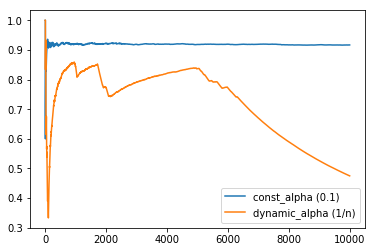

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import timeit

class bandit_arm_v3():
    def __init__(self, mean: float, std: float):
        # Start equally
        self.mean = 0
        self.std = 0.1
        
        # Random walk parameters
        self.mean_change = mean
        self.std_change = std
        
        self.distribution = np.random.normal
        
    def random_walk(self):
        self.mean += self.distribution(loc=self.mean_change,
                                       scale=self.std_change)
        
    def r(self):
        while True:
            self.random_walk()
            yield self.distribution(loc=self.mean, 
                                    scale=self.std)

class bandit_v3():
    def __init__(self, k: int, eps: float, const_alpha: bool):
        self.A = self._create_arms(k)
        self.R = dict()
        self.epsilon = eps
        self.n = 0
        self.chosen = np.zeros(k)
        self.total_reward = 0
        self.cum_rewards = []
        self.is_optimal = 0
        self.cum_optimal = []
        self.const_alpha = const_alpha
        
    def game(self, T: int):
        self.R = self._init_rewards()
        self.total_reward = 0
        self.n = 0
        for i in range(T):
            self.n += 1
            Rt = self.play()
            self.total_reward += Rt
            self.cum_rewards.append(self.total_reward)
            self.cum_optimal.append(self.is_optimal / (i+1))
        return self.total_reward
            
    def play(self):
        a = self._choose_action()
        self.is_optimal += self._is_optimal(a)
        return self._do_action(a)
        
    def _create_arms(self, k: int):
        return [bandit_arm_v3(0, 1) for a in range(k)]
    
    def _get_optimal_hand(self):
        hands_rewards = list(map(lambda arm: arm.mean, self.A))
        return np.argmax(hands_rewards)
    
    def _is_optimal(self, chosen_hand: int):
        return 1 if chosen_hand == self._get_optimal_hand() else 0
    
    def _init_rewards(self):
        rewards = dict()
        for arm in range(len(self.A)):
            rewards[arm] = 0
        return rewards
    
    def _choose_action(self):
        r = np.random.uniform()
        if r > self.epsilon:
            Qt_with_indexes = [(self.R[k], k) for k in self.R.keys()]
            Qt = [r[0] for r in Qt_with_indexes]
            if Qt:
                chosen_arm =  np.argmax(Qt)
                chosen_arm = Qt_with_indexes[chosen_arm][1]
            else:
                chosen_arm = np.random.choice(range(len(self.A)))
        else:
            chosen_arm = np.random.choice(range(len(self.A)))
        return chosen_arm
    
    def _do_action(self, a):
        Rt = next(self.A[a].r())
        alpha = 0.1 if self.const_alpha else (1/self.n)
        self.R[a] += alpha * (Rt - self.R[a])
        self.chosen[a] += 1
        return Rt

k = 5
epsilon = 0.1
T = 10000
bandit_const_alpha = bandit_v3(k, epsilon, True)
bandit_dynamic_alpha = bandit_v3(k, epsilon, False)

def run_simulation(bandit: bandit_v3):
    total_reward = bandit.game(T)
    optimal_reward = np.max(list(map(lambda x: x.mean, bandit.A)))
    total_optimal_reward = T * optimal_reward
    print('K-Arm Bandit with Incremental-Sample-Average Q Function')
    print(f'Total Reward: {total_reward}')
    print(f'Optimal Reward: {optimal_reward}\tOptimal Total Reward: {total_optimal_reward}')
    print(f'Regret: {total_optimal_reward - total_reward} / {100*(1-(total_reward/total_optimal_reward)):.2f}%')
    for i in bandit.R:
        print(f'arm {i}:\t # chosen: {bandit.chosen[i]:0.0f}\t mean: {bandit.R[i]}\t true: {bandit.A[i].mean}\t delta: {abs(bandit.A[i].mean-bandit.R[i])}\t delta %: {abs(1-bandit.A[i].mean/np.mean(bandit.R[i]))}\n')
    return bandit

print('**Constant Alpha**')
bc = run_simulation(bandit_const_alpha)
print('**Dynamic Alpha**')
bd = run_simulation(bandit_dynamic_alpha)
# sns.lineplot(range(T), b2.cum_optimal)


plt.plot(bc.cum_optimal, label='const_alpha (0.1)')
plt.plot(bd.cum_optimal, label='dynamic_alpha (1/n)')
plt.legend()
plt.show()